#MXNet (From Scratch)

In [0]:
import mxnet as mx
from mxnet import nd
import matplotlib.pyplot as plt

ctx = mx.gpu()

#Understanding convolution

##Getting the data

In [0]:
mnist = mx.gluon.data.vision.MNIST()

(28, 28)


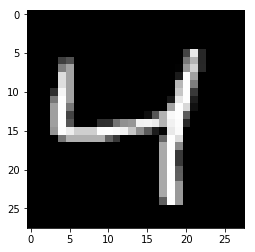

In [3]:
image, _ = mnist[2]

image = image.flatten().astype('float32').as_in_context(ctx)

print(image.shape)

plt.imshow(image.asnumpy(), cmap = 'gray')
plt.show()

In [0]:
def convolution(inputs, kernal):
    filter_hight, filter_width = kernal.shape
    hight, width = (inputs.shape[0] - filter_hight) + 1, (inputs.shape[1] - filter_width) + 1
    
    layer = nd.zeros((int(hight), int(width)))
    
    row = 0
    for i in range(0, inputs.shape[0]):
        col = 0
        for j in range(0, inputs.shape[1]):
            if (i + filter_hight <= inputs.shape[0]) and (j + filter_width <= inputs.shape[1]):
                layer[row, col] = (inputs[i:i + filter_hight, j:j + filter_width] * kernal).sum()
            col += 1
        row += 1
    return layer

## This filter we are using below can detect vertical edges in the image

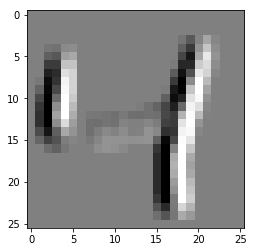

(26, 26)

In [5]:
kernal = nd.array([[1.0, 0.0, -1.0],
                   [1.0, 0.0, -1.0],
                   [1.0, 0.0, -1.0]], ctx = ctx)

output = convolution(image, kernal)

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

## This filter we are using below can detect horizontal edges in the image

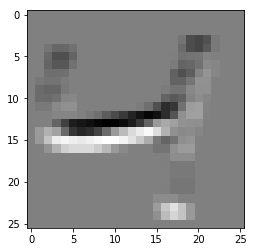

(26, 26)

In [6]:
kernal = nd.array([[1, 1, 1],
                   [0, 0, 0],
                   [-1, -1, -1]], ctx = ctx)

output = convolution(image, kernal)

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

##Lets see some more examples with different types of filters.

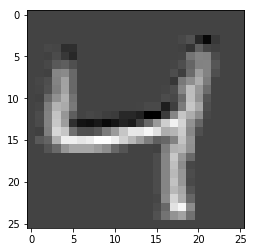

(26, 26)

In [7]:
kernal = nd.random.normal(0, 1, (3, 3)).as_in_context(ctx)
# wondering what this random filter would generate?? Me too!! lets see.

output = convolution(image, kernal)

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

## Time to check out a 5 by 5 random filter

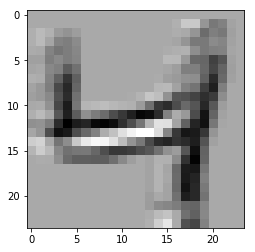

(24, 24)

In [8]:
kernal = nd.random.normal(0, 1, (5, 5)).as_in_context(ctx)

output = convolution(image, kernal)

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

## Lets try one more time

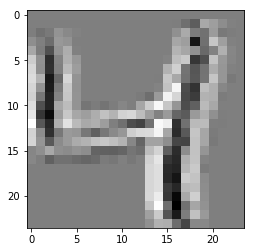

(24, 24)

In [9]:
kernal = nd.random.normal(0, 1, (5, 5)).as_in_context(ctx)

output = convolution(image, kernal)

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

## Lets try 7 by 7 this time

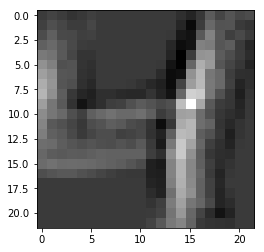

(22, 22)

In [10]:
kernal = nd.random.normal(0, 1, (7, 7)).as_in_context(ctx)

output = convolution(image, kernal)

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape